In [ ]:
import pandas as pd

df = pd.read_csv("data/lightcast_job_postings.csv")
df.head()

/var/folders/26/v6t81nld5vs4r2jzwsr2pq5w0000gn/T/ipykernel_16223/1569299658.py:4: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.



,ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,...,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,9/6/2024,2024-09-06 20:32:57.352 Z,0.0,6/2/2024,6/8/2024,6.0,"[\n ""Company""\n]","[\n ""brassring.com""\n]","[\n ""https://sjobs.brassring.com/TGnewUI/Sear...",...,44.0,Retail Trade,441.0,Motor Vehicle and Parts Dealers,4413.0,"Automotive Parts, Accessories, and Tire Retailers",44133.0,Automotive Parts and Accessories Retailers,441330.0,Automotive Parts and Accessories Retailers
1,0cb072af26757b6c4ea9464472a50a443af681ac,8/2/2024,2024-08-02 17:08:58.838 Z,0.0,6/2/2024,8/1/2024,NaN,"[\n ""Job Board""\n]","[\n ""maine.gov""\n]","[\n ""https://joblink.maine.gov/jobs/1085740""\n]",...,56.0,Administrative and Support and Waste Managemen...,561.0,Administrative and Support Services,5613.0,Employment Services,56132.0,Temporary Help Services,561320.0,Temporary Help Services
2,85318b12b3331fa490d32ad014379df01855c557,9/6/2024,2024-09-06 20:32:57.352 Z,1.0,6/2/2024,7/7/2024,35.0,"[\n ""Job Board""\n]","[\n ""dejobs.org""\n]","[\n ""https://dejobs.org/dallas-tx/data-analys...",...,52.0,Finance and Insurance,524.0,Insurance Carriers and Related Activities,5242.0,"Agencies, Brokerages, and Other Insurance Rela...",52429.0,Other Insurance Related Activities,524291.0,Claims Adjusting
3,1b5c3941e54a1889ef4f8ae55b401a550708a310,9/6/2024,2024-09-06 20:32:57.352 Z,1.0,6/2/2024,7/20/2024,48.0,"[\n ""Job Board""\n]","[\n ""disabledperson.com"",\n ""dejobs.org""\n]","[\n ""https://www.disabledperson.com/jobs/5948...",...,52.0,Finance and Insurance,522.0,Credit Intermediation and Related Activities,5221.0,Depository Credit Intermediation,52211.0,Commercial Banking,522110.0,Commercial Banking
4,cb5ca25f02bdf25c13edfede7931508bfd9e858f,6/19/2024,2024-06-19 07:00:00.000 Z,0.0,6/2/2024,6/17/2024,15.0,"[\n ""FreeJobBoard""\n]","[\n ""craigslist.org""\n]","[\n ""https://modesto.craigslist.org/sls/77475...",...,99.0,Unclassified Industry,999.0,Unclassified Industry,9999.0,Unclassified Industry,99999.0,Unclassified Industry,999999.0,Unclassified Industry


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df_model = df[["SALARY", "MIN_YEARS_EXPERIENCE", "DURATION", "EMPLOYMENT_TYPE_NAME"]].dropna()

X = df_model[["MIN_YEARS_EXPERIENCE", "DURATION", "EMPLOYMENT_TYPE_NAME"]]
y = df_model["SALARY"]


numeric_features = ["MIN_YEARS_EXPERIENCE", "DURATION"]
categorical_features = ["EMPLOYMENT_TYPE_NAME"]

preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(11532, 3) (2884, 3)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 35894.98624509918
MAE: 27426.896607498304
R²: 0.2549839339127469


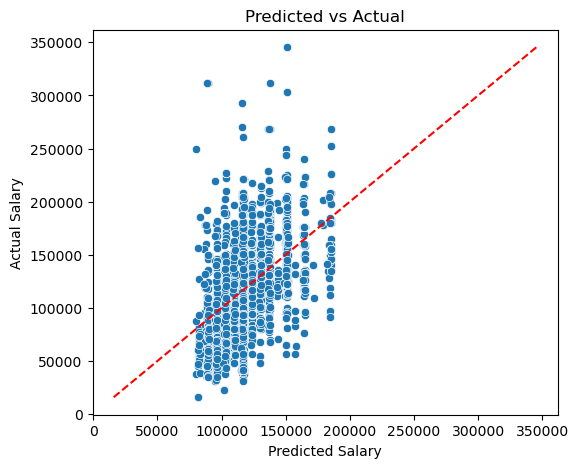

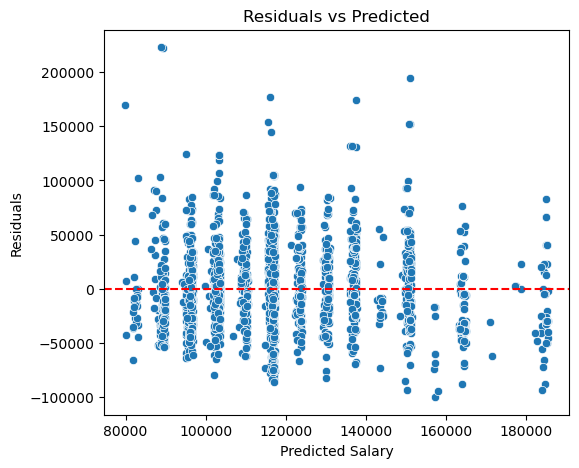

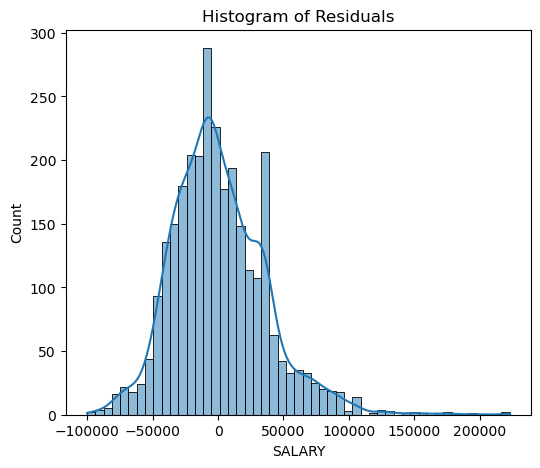

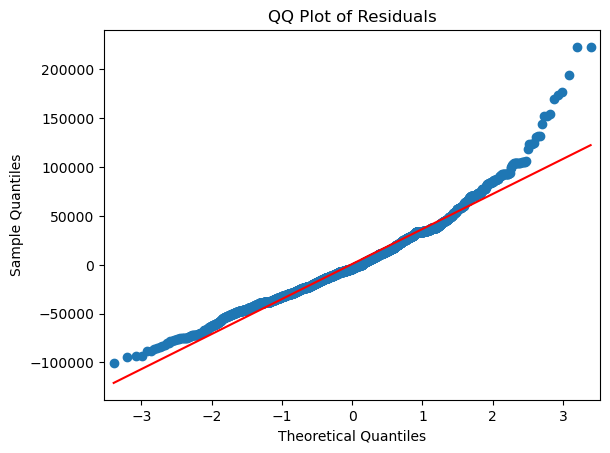

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

residuals = y_test - y_pred

# 1. Predicted vs Actual
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual")
plt.xlabel("Predicted Salary")
plt.ylabel("Actual Salary")
plt.show()

# 2. Residuals vs Predicted
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.show()

# 3. Residuals Histogram
plt.figure(figsize=(6,5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# 4. QQ Plot
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()


<Figure size 600x500 with 0 Axes>

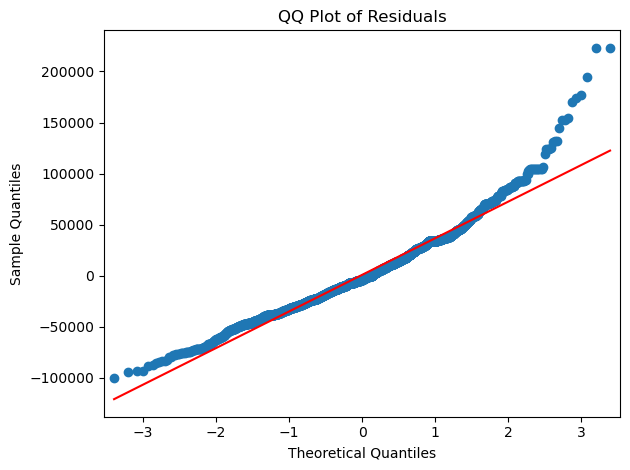

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# QQ Plot
plt.figure(figsize=(6,5))
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.savefig("_output/glr_residuals_qq.png")
plt.show()

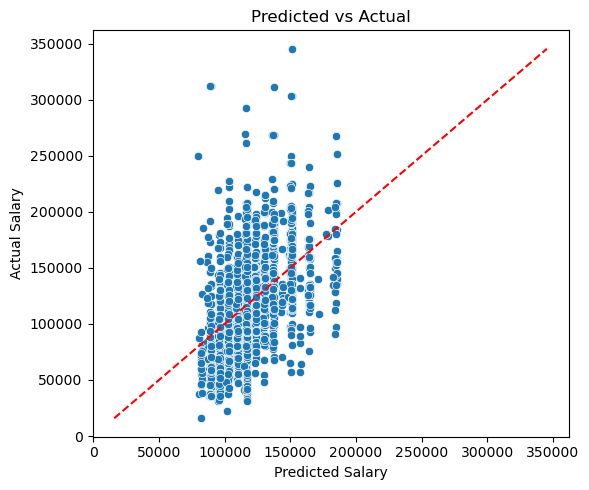

In [10]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual")
plt.xlabel("Predicted Salary")
plt.ylabel("Actual Salary")
plt.tight_layout()
plt.savefig("_output/glr_predicted_vs_actual.png")
plt.show()